In [434]:
# !pip install pandas
# !pip install openpyxl
# !pip install scikit-learn
# !pip install category_encoders
# !pip install matplotlib
# !pip install seaborn
# !pip install imblearn
!pip install tensorflow

import pandas as pd


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/d1/93/0f4cf5058095d749d464e4f770d2bf339930e5f3374331f0d2fa6ddfbf28/

In [339]:
csv_file_path = 'customer_churn_large_dataset.xlsx'
df = pd.read_excel(csv_file_path)
df.head()


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [340]:
df.shape


(100000, 9)

In [341]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [343]:
df.describe(include="all")

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,100000,NaN,2,5,NaN,NaN,NaN,NaN
top,NaN,Customer_1,NaN,Female,Houston,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,50216,20157,NaN,NaN,NaN,NaN
mean,50000.500000,NaN,44.027020,NaN,NaN,12.490100,65.053197,274.393650,0.497790
std,28867.657797,NaN,15.280283,NaN,NaN,6.926461,20.230696,130.463063,0.499998
min,1.000000,NaN,18.000000,NaN,NaN,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,NaN,31.000000,NaN,NaN,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,NaN,44.000000,NaN,NaN,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,NaN,57.000000,NaN,NaN,19.000000,82.640000,387.000000,1.000000


In [344]:
# The average churn rate is approximately 0.498, indicating that about half of the customers in the dataset have churned  

In [345]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<Axes: >

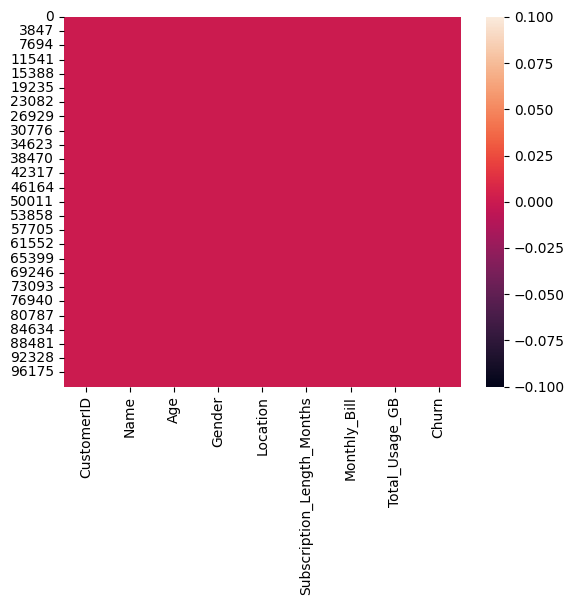

In [346]:
import seaborn as sns

sns.heatmap(df.isnull())

In [347]:
#there are no null values 

In [348]:
df.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [349]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [350]:
df=df.drop(["CustomerID","Name"],axis=1)

In [351]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [352]:
def print_unique_col_values(df):
       for column in df:
             # if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [353]:
print_unique_col_values(df)

Age: [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]
Gender: ['Male' 'Female']
Location: ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
Subscription_Length_Months: [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]
Monthly_Bill: [73.36 48.76 85.47 ... 75.21 41.98 83.55]
Total_Usage_GB: [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 304 281 177 117 137 322 427 403 237 439 336
 344 288 257 196 365 419 111 192 244 287 395 213 109 286 283 230 491 274
 335 462 407 126 199 351 261 496 480 400 303 197 181 474

In [354]:
# One-Hot Encoding for Location 

In [355]:
df["Location"].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [356]:
df = pd.get_dummies(df, columns=['Location'], prefix='Location')
df = df.drop(columns=['Location_Los Angeles'])
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Miami,Location_New York
0,63,Male,17,73.36,236,0,False,False,False,False
1,62,Female,1,48.76,172,0,False,False,False,True
2,24,Female,5,85.47,460,0,False,False,False,False
3,36,Female,3,97.94,297,1,False,False,True,False
4,46,Female,19,58.14,266,0,False,False,True,False


In [357]:
bool_columns_to_convert = ['Location_Chicago', 'Location_Houston', 'Location_Miami', 'Location_New York']
df[bool_columns_to_convert] = df[bool_columns_to_convert].astype(int)

In [358]:
# Label Encoding for Gender

In [359]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [360]:
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Miami,Location_New York
0,63,1,17,73.36,236,0,0,0,0,0
1,62,0,1,48.76,172,0,0,0,0,1
2,24,0,5,85.47,460,0,0,0,0,0
3,36,0,3,97.94,297,1,0,0,1,0
4,46,0,19,58.14,266,0,0,0,1,0


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  int32  
 2   Subscription_Length_Months  100000 non-null  int64  
 3   Monthly_Bill                100000 non-null  float64
 4   Total_Usage_GB              100000 non-null  int64  
 5   Churn                       100000 non-null  int64  
 6   Location_Chicago            100000 non-null  int32  
 7   Location_Houston            100000 non-null  int32  
 8   Location_Miami              100000 non-null  int32  
 9   Location_New York           100000 non-null  int32  
dtypes: float64(1), int32(5), int64(4)
memory usage: 5.7 MB


In [362]:
print(df['Subscription_Length_Months'].max())

24


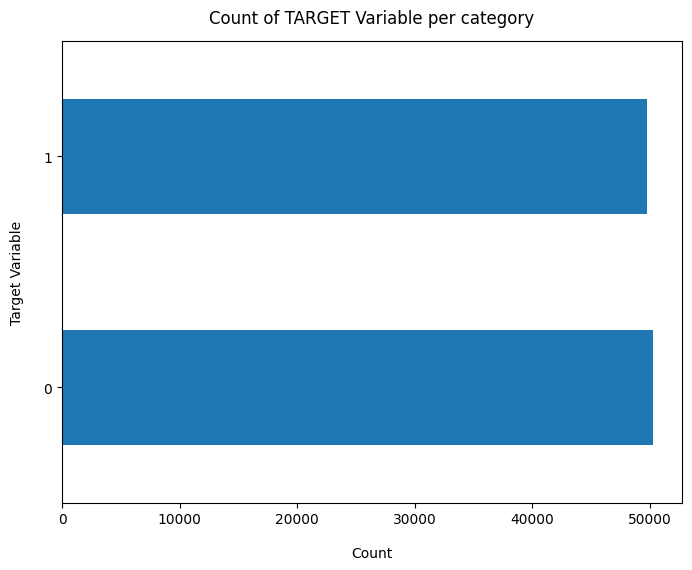

In [363]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [364]:
100*df['Churn'].value_counts()/len(df['Churn'])


Churn
0    50.221
1    49.779
Name: count, dtype: float64

In [365]:
df['Churn'].value_counts()


Churn
0    50221
1    49779
Name: count, dtype: int64

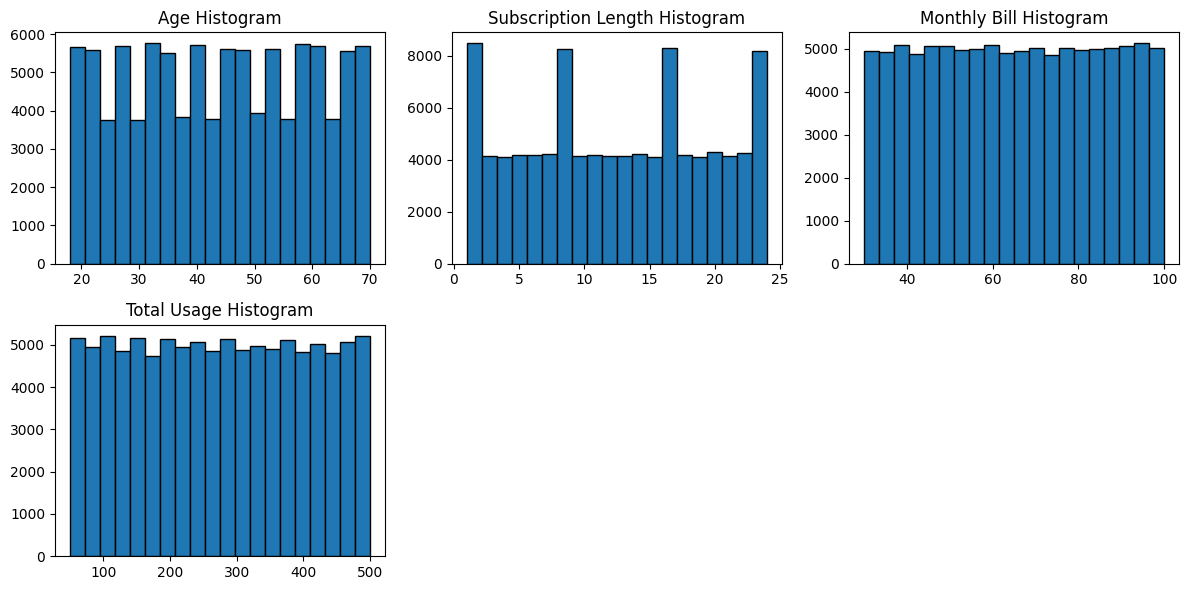

In [366]:
import matplotlib.pyplot as plt

# Create subplots for histograms
plt.figure(figsize=(12, 6))

# Age histogram
plt.subplot(2, 3, 1)
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.title('Age Histogram')

# Subscription_Length_Months histogram
plt.subplot(2, 3, 2)
plt.hist(df['Subscription_Length_Months'], bins=20, edgecolor='k')
plt.title('Subscription Length Histogram')

# Monthly_Bill histogram
plt.subplot(2, 3, 3)
plt.hist(df['Monthly_Bill'], bins=20, edgecolor='k')
plt.title('Monthly Bill Histogram')

# Total_Usage_GB histogram
plt.subplot(2, 3, 4)
plt.hist(df['Total_Usage_GB'], bins=20, edgecolor='k')
plt.title('Total Usage Histogram')

plt.tight_layout()
plt.show()


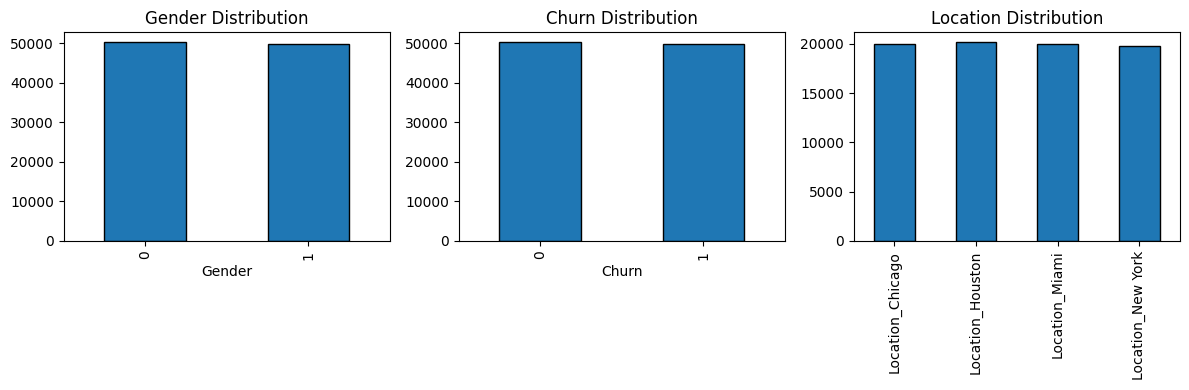

In [367]:
# Create subplots for bar charts
plt.figure(figsize=(12, 4))

# Gender bar chart
plt.subplot(1, 3, 1)
df['Gender'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Gender Distribution')

# Churn bar chart
plt.subplot(1, 3, 2)
df['Churn'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Churn Distribution')

# Location bar chart
plt.subplot(1, 3, 3)
location_columns = ['Location_Chicago', 'Location_Houston', 'Location_Miami', 'Location_New York']
location_counts = df[location_columns].sum()
location_counts.plot(kind='bar', edgecolor='k')
plt.title('Location Distribution')

plt.tight_layout()
plt.show()


C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py

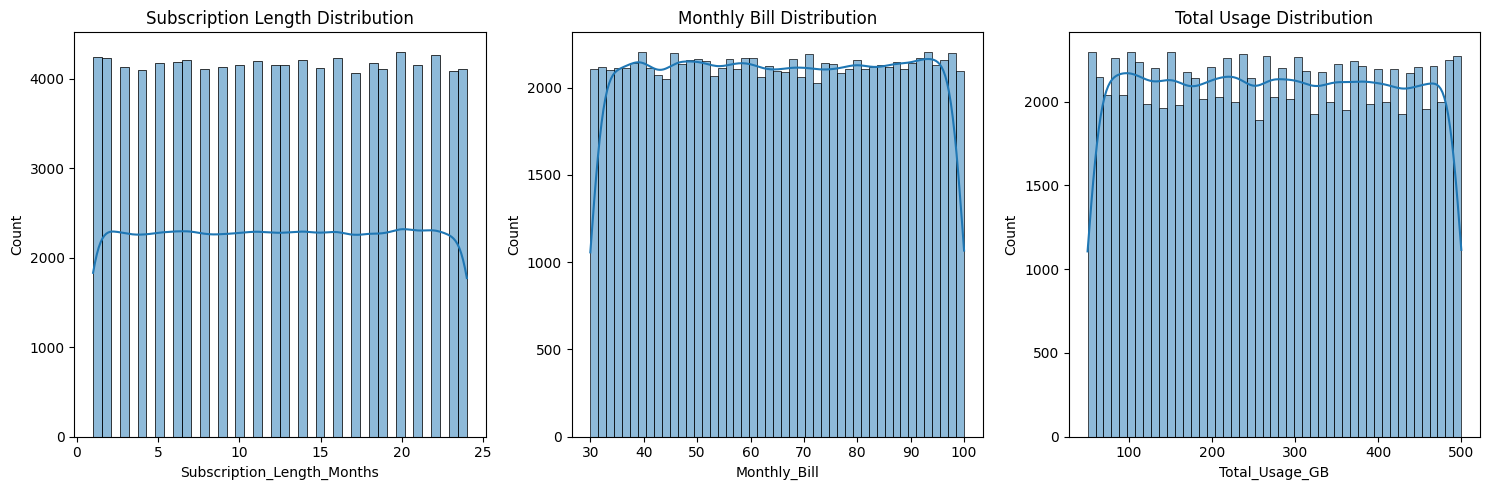

Summary Statistics:
       Subscription_Length_Months   Monthly_Bill  Total_Usage_GB
count               100000.000000  100000.000000   100000.000000
mean                    12.490100      65.053197      274.393650
std                      6.926461      20.230696      130.463063
min                      1.000000      30.000000       50.000000
25%                      6.000000      47.540000      161.000000
50%                     12.000000      65.010000      274.000000
75%                     19.000000      82.640000      387.000000
max                     24.000000     100.000000      500.000000


In [368]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for univariate analysis
plt.figure(figsize=(15, 5))

# Subscription_Length_Months analysis
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Subscription_Length_Months', kde=True)
plt.title('Subscription Length Distribution')

# Monthly_Bill analysis
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Monthly_Bill', kde=True)
plt.title('Monthly Bill Distribution')

# Total_Usage_GB analysis
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Total_Usage_GB', kde=True)
plt.title('Total Usage Distribution')

plt.tight_layout()
plt.show()

# Summary statistics
print("Summary Statistics:")
print(df[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']].describe())


In [369]:
# The subscription lengths in the dataset range from a minimum of 1 month to a maximum of 24 months, 
# with 25% of customers having a subscription of 6 months or less,
# 50% having a subscription of 12 months or less,
# and 75% having a subscription of 19 months or less.

C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

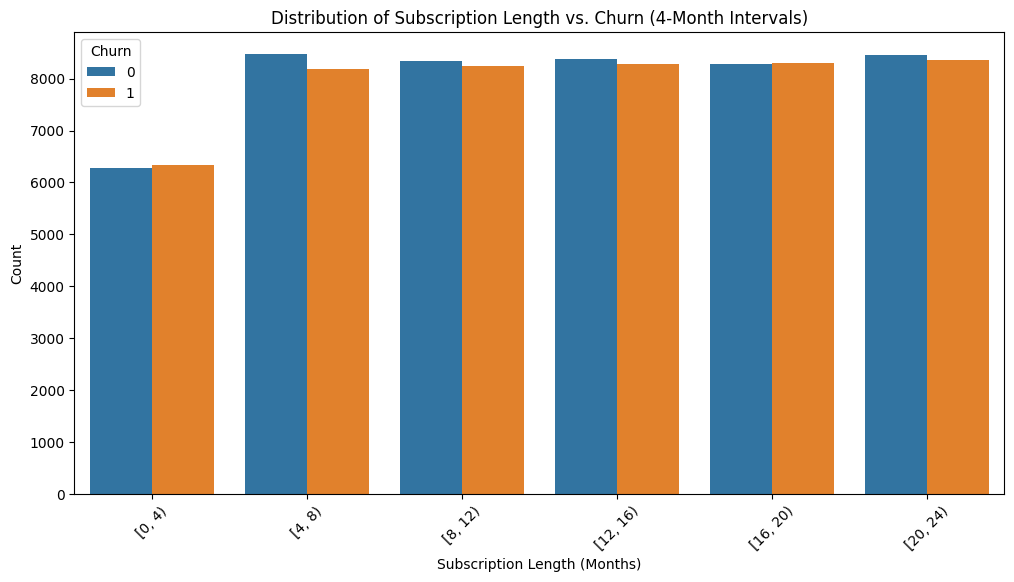

In [370]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the bin ranges with 1-month intervals
bins = [i for i in range(0, 25,4)]  # Create bins for each month from 0 to 24

# Create a new column in the DataFrame to represent the bins
df['Subscription_Length_Bin'] = pd.cut(df['Subscription_Length_Months'], bins=bins, right=False)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Subscription_Length_Bin', hue='Churn')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Count')
plt.title('Distribution of Subscription Length vs. Churn (4-Month Intervals)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

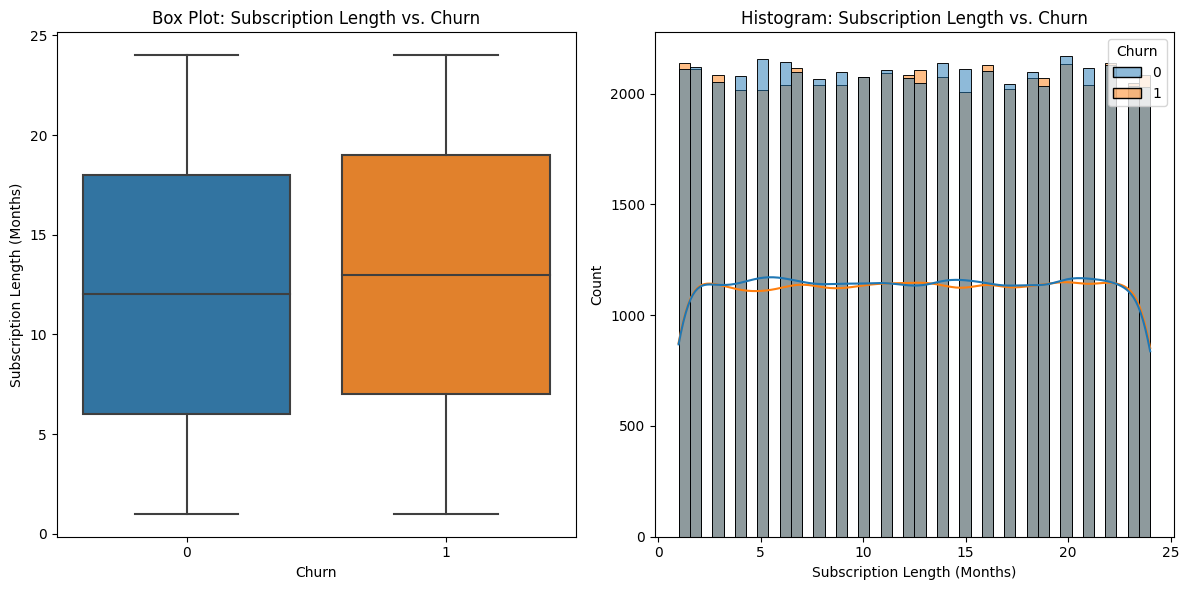

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for box plots and histograms
plt.figure(figsize=(12, 6))

# Box plot for subscription length vs. churn
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='Subscription_Length_Months')
plt.xlabel('Churn')
plt.ylabel('Subscription Length (Months)')
plt.title('Box Plot: Subscription Length vs. Churn')

# Histograms for subscription length for churned and non-churned customers
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Subscription_Length_Months', hue='Churn', kde=True)
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Count')
plt.title('Histogram: Subscription Length vs. Churn')

plt.tight_layout()
plt.show()


C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\AppData\Local\Temp\ipykernel_14116\1287998148.py:16: FutureWarning: 

`shade` is now deprecated 

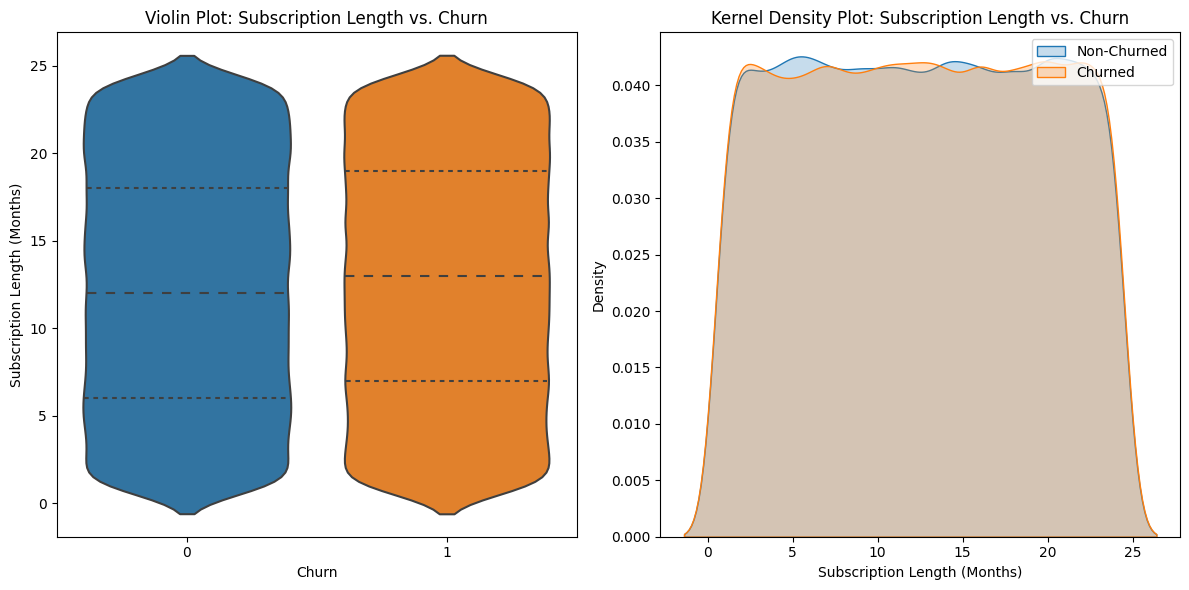

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for violin plot and kernel density plot
plt.figure(figsize=(12, 6))

# Violin plot for subscription length vs. churn
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='Churn', y='Subscription_Length_Months', inner='quart')
plt.xlabel('Churn')
plt.ylabel('Subscription Length (Months)')
plt.title('Violin Plot: Subscription Length vs. Churn')

# Kernel density plot for subscription length for churned and non-churned customers
plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['Churn'] == 0]['Subscription_Length_Months'], label='Non-Churned', shade=True)
sns.kdeplot(data=df[df['Churn'] == 1]['Subscription_Length_Months'], label='Churned', shade=True)
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Density')
plt.title('Kernel Density Plot: Subscription Length vs. Churn')
plt.legend()

plt.tight_layout()
plt.show()


In [373]:
df["Subscription_Length_Months"].skew()

-0.0016554824859520909

C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

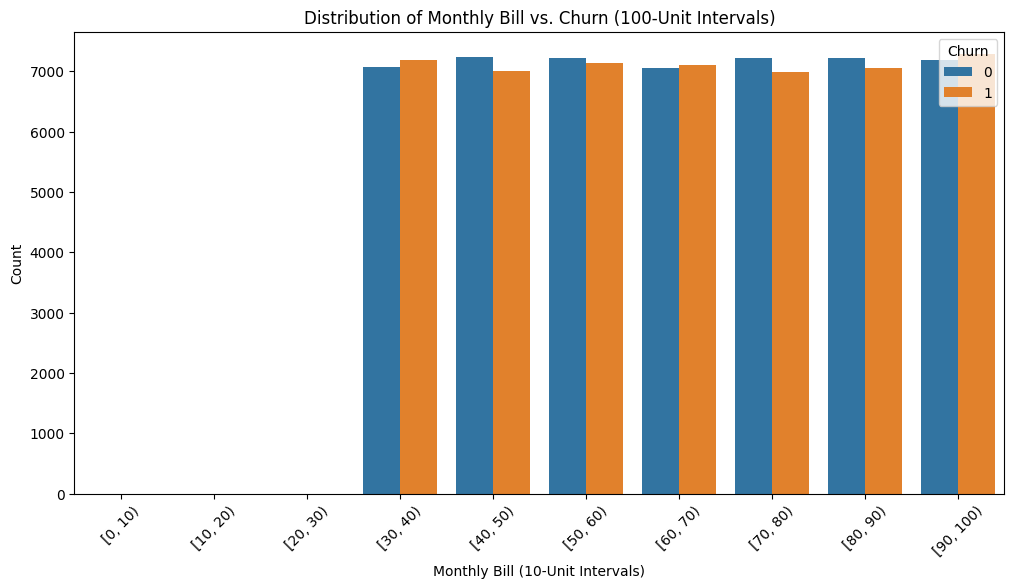

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the bin ranges with 100-unit intervals
bill_bins = [i for i in range(0, 101, 10)]  # Create bins for each 100 units from 0 to 100

# Create a new column in the DataFrame to represent the bins
df['Monthly_Bill_Bin'] = pd.cut(df['Monthly_Bill'], bins=bill_bins, right=False)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Monthly_Bill_Bin', hue='Churn')
plt.xlabel('Monthly Bill (10-Unit Intervals)')
plt.ylabel('Count')
plt.title('Distribution of Monthly Bill vs. Churn (100-Unit Intervals)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

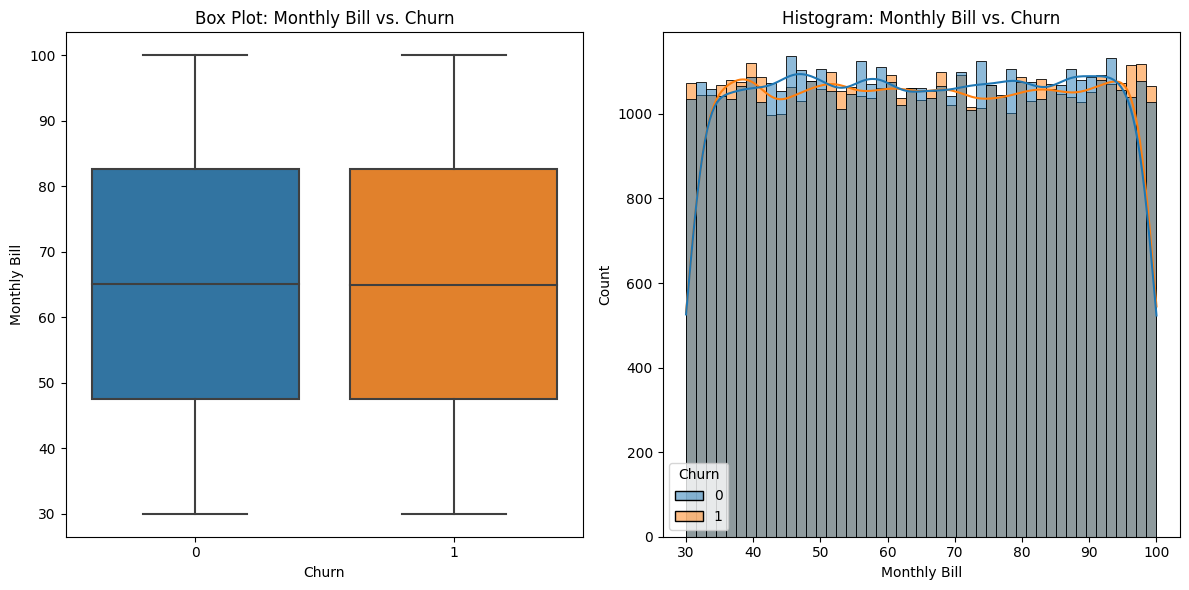

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for box plots and histograms
plt.figure(figsize=(12, 6))

# Box plot for monthly bill vs. churn
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='Monthly_Bill')
plt.xlabel('Churn')
plt.ylabel('Monthly Bill')
plt.title('Box Plot: Monthly Bill vs. Churn')

# Histograms for monthly bill for churned and non-churned customers
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Monthly_Bill', hue='Churn', kde=True)
plt.xlabel('Monthly Bill')
plt.ylabel('Count')
plt.title('Histogram: Monthly Bill vs. Churn')

plt.tight_layout()
plt.show()


C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\AppData\Local\Temp\ipykernel_14116\1140376696.py:16: FutureWarning: 

`shade` is now deprecated 

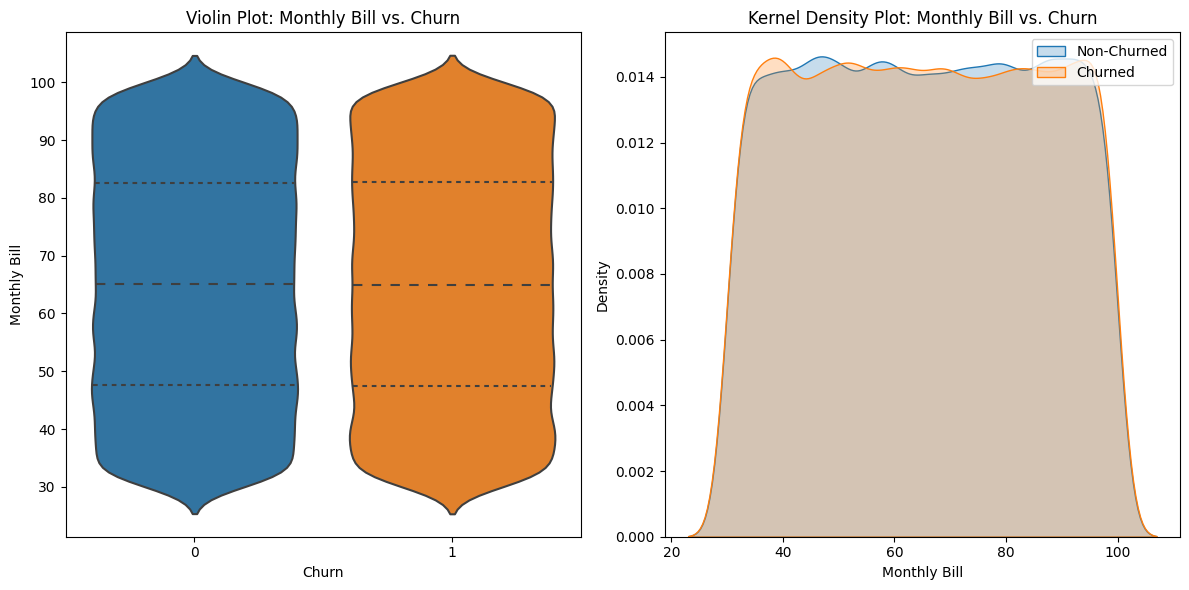

In [376]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for violin plot and kernel density plot
plt.figure(figsize=(12, 6))

# Violin plot for monthly bill vs. churn
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='Churn', y='Monthly_Bill', inner='quart')
plt.xlabel('Churn')
plt.ylabel('Monthly Bill')
plt.title('Violin Plot: Monthly Bill vs. Churn')

# Kernel density plot for monthly bill for churned and non-churned customers
plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['Churn'] == 0]['Monthly_Bill'], label='Non-Churned', shade=True)
sns.kdeplot(data=df[df['Churn'] == 1]['Monthly_Bill'], label='Churned', shade=True)
plt.xlabel('Monthly Bill')
plt.ylabel('Density')
plt.title('Kernel Density Plot: Monthly Bill vs. Churn')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


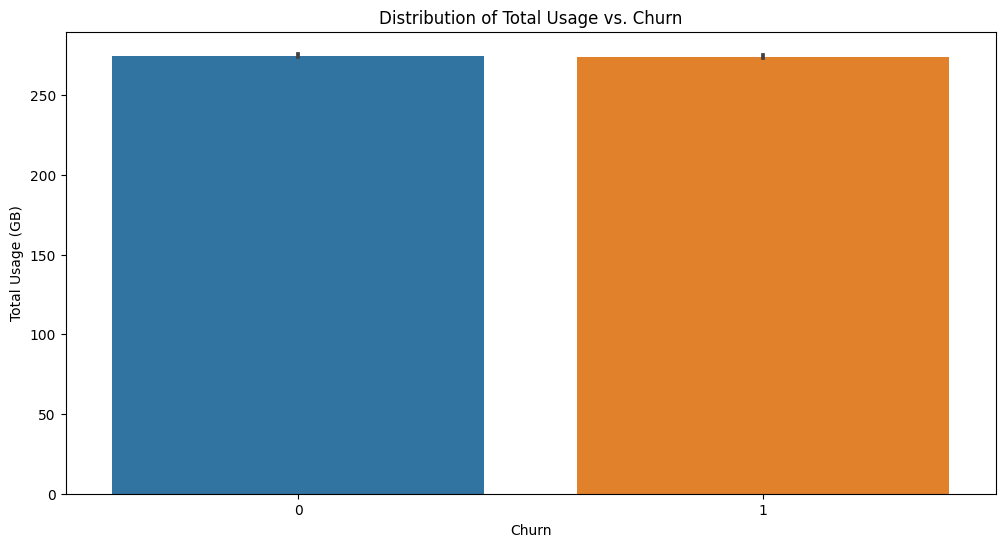

In [377]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to visualize the distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Churn', y='Total_Usage_GB')
plt.xlabel('Churn')
plt.ylabel('Total Usage (GB)')
plt.title('Distribution of Total Usage vs. Churn')
plt.show()


C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

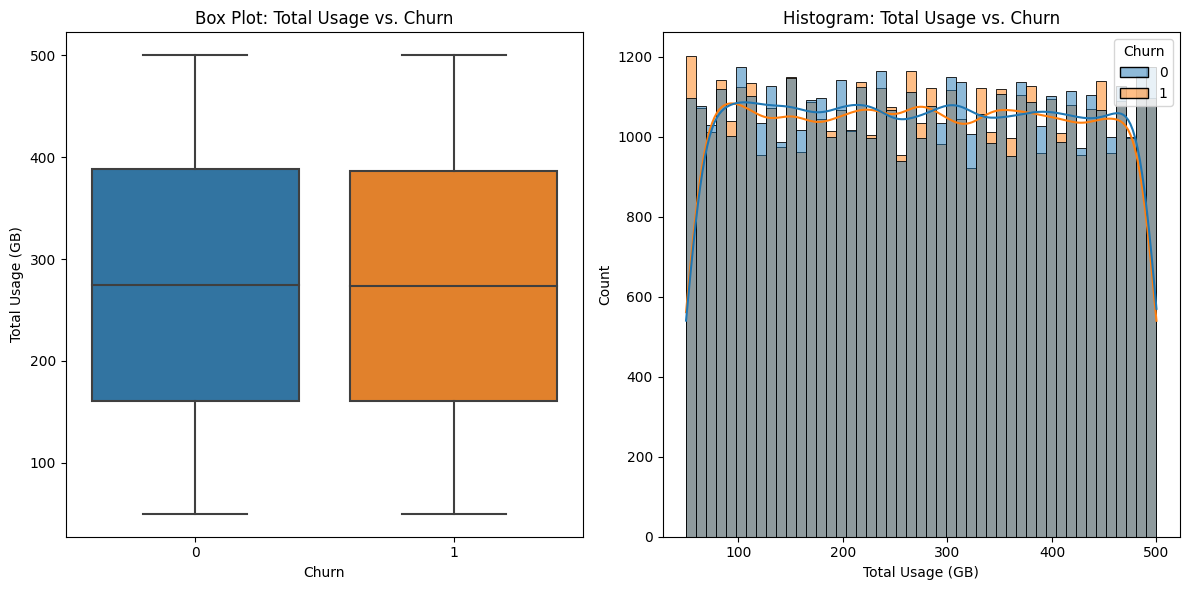

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for box plot and histogram
plt.figure(figsize=(12, 6))

# Box plot for total usage vs. churn
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='Total_Usage_GB')
plt.xlabel('Churn')
plt.ylabel('Total Usage (GB)')
plt.title('Box Plot: Total Usage vs. Churn')

# Histograms for total usage for churned and non-churned customers
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Total_Usage_GB', hue='Churn', kde=True)
plt.xlabel('Total Usage (GB)')
plt.ylabel('Count')
plt.title('Histogram: Total Usage vs. Churn')

plt.tight_layout()
plt.show()


C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\AppData\Local\Temp\ipykernel_14116\2813164861.py:16: FutureWarning: 

`shade` is now deprecated 

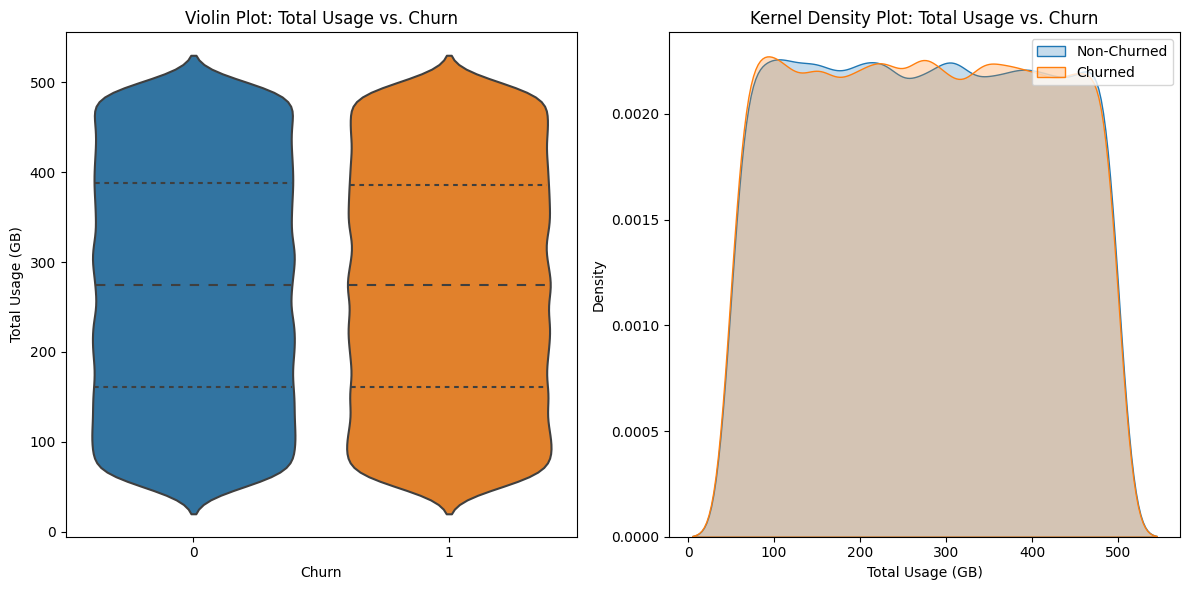

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for violin plot and kernel density plot
plt.figure(figsize=(12, 6))

# Violin plot for total usage vs. churn
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='Churn', y='Total_Usage_GB', inner='quart')
plt.xlabel('Churn')
plt.ylabel('Total Usage (GB)')
plt.title('Violin Plot: Total Usage vs. Churn')

# Kernel density plot for total usage for churned and non-churned customers
plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['Churn'] == 0]['Total_Usage_GB'], label='Non-Churned', shade=True)
sns.kdeplot(data=df[df['Churn'] == 1]['Total_Usage_GB'], label='Churned', shade=True)
plt.xlabel('Total Usage (GB)')
plt.ylabel('Density')
plt.title('Kernel Density Plot: Total Usage vs. Churn')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SATHYA\Desktop\ML\Customer_Churn_Prediction\virtual_env\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

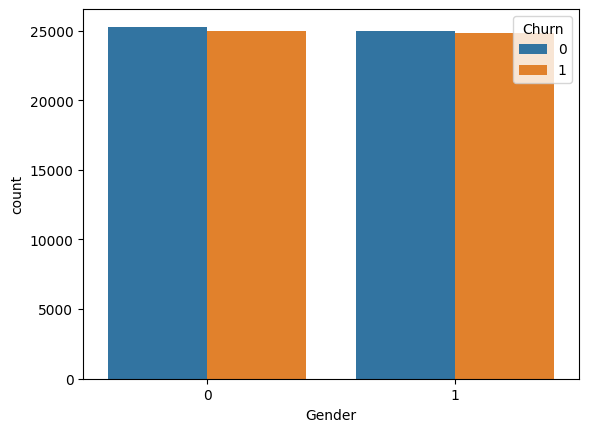

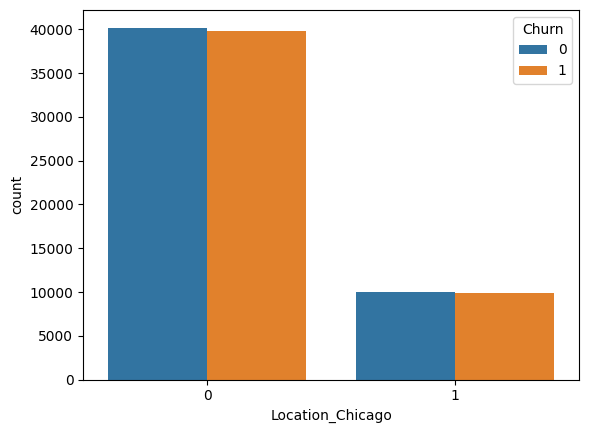

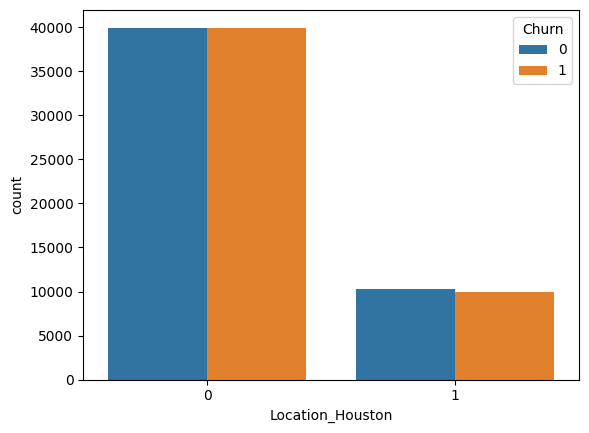

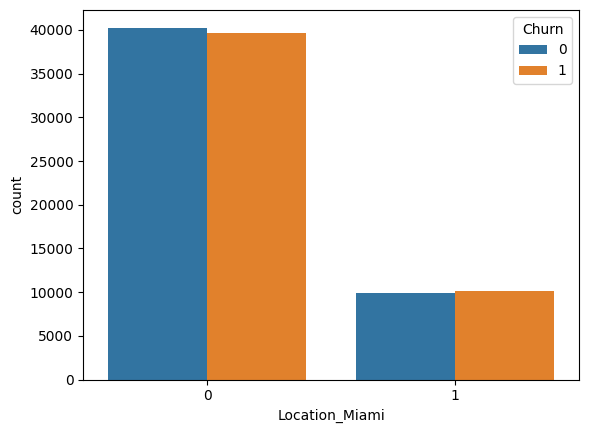

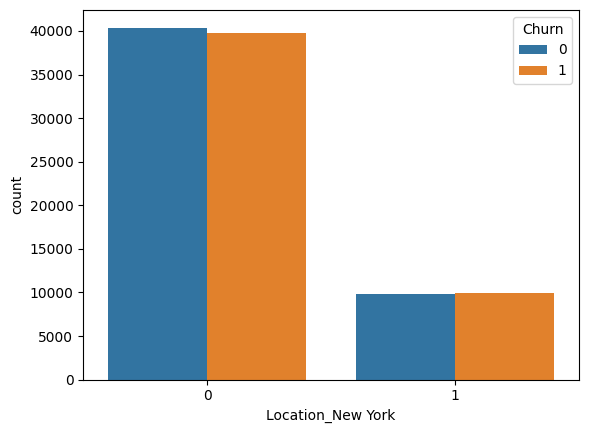

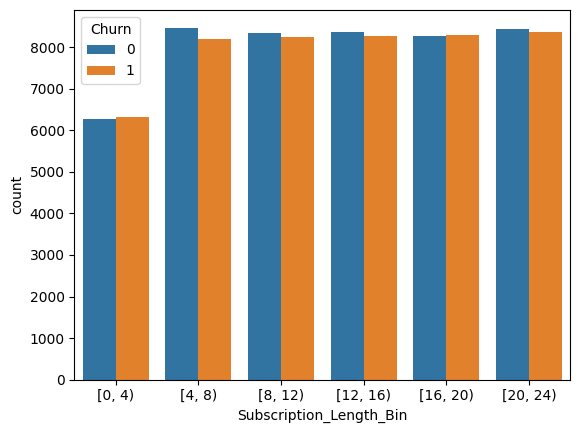

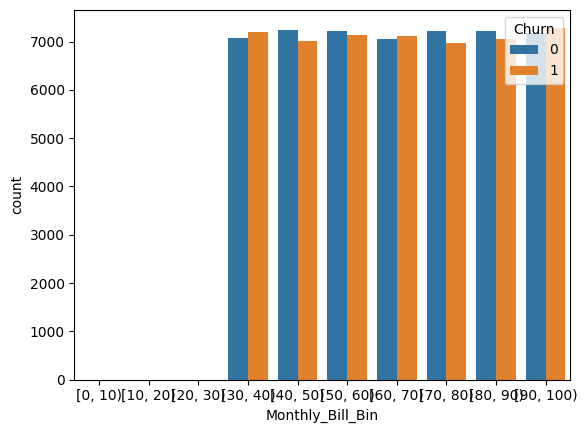

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns


for i, predictor in enumerate(df.drop(columns=['Churn', 'Subscription_Length_Months','Age','Monthly_Bill','Total_Usage_GB'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')


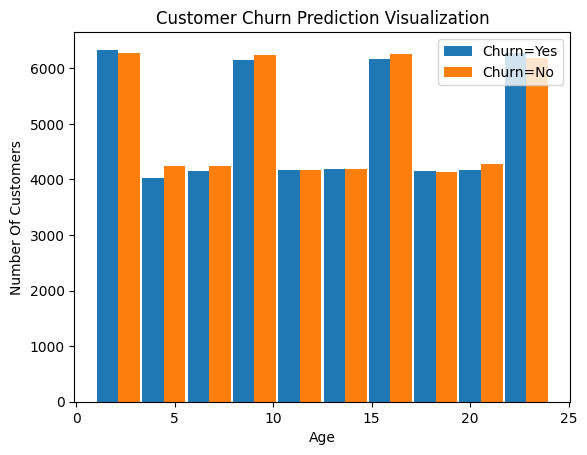

In [381]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have two datasets: age_churn_yes and age_churn_no
age_churn_yes = df[df['Churn'] == 1]['Subscription_Length_Months']
age_churn_no = df[df['Churn'] == 0]['Subscription_Length_Months']

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([age_churn_yes, age_churn_no], bins=10, rwidth=0.95,  label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()


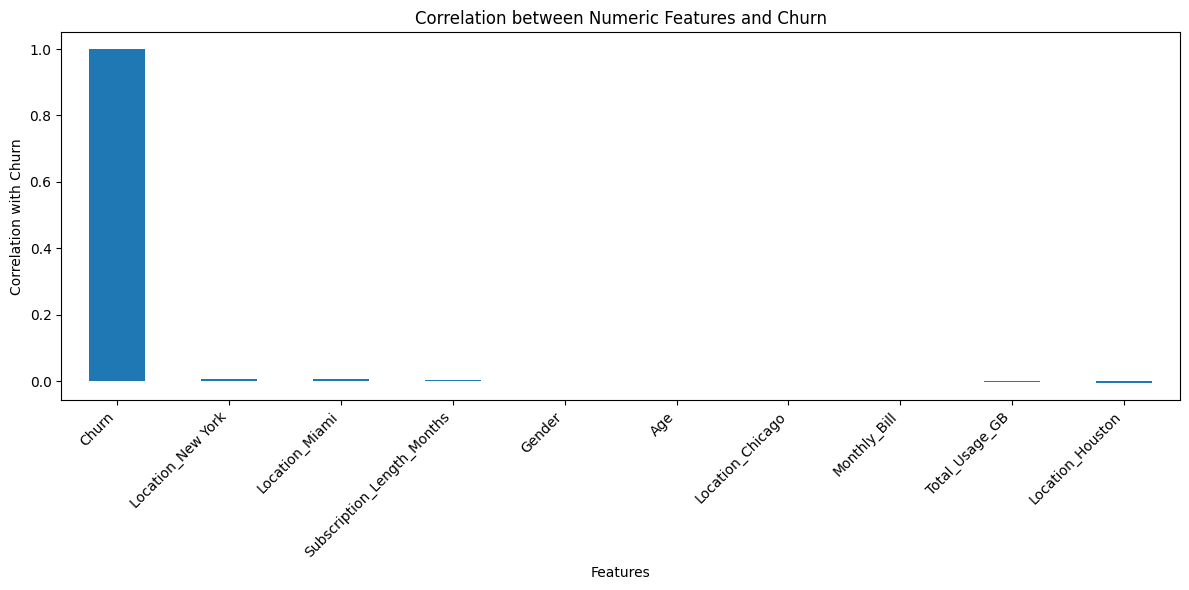

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric features for correlation analysis
numeric_features = df.select_dtypes(include=[np.number])

# Calculate the correlation between numeric features and 'Churn'
correlations = numeric_features.corr()['Churn'].sort_values(ascending=False)

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the correlations
ax = correlations.plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel("Features")
plt.ylabel("Correlation with Churn")
plt.title("Correlation between Numeric Features and Churn")
plt.tight_layout()
plt.show()


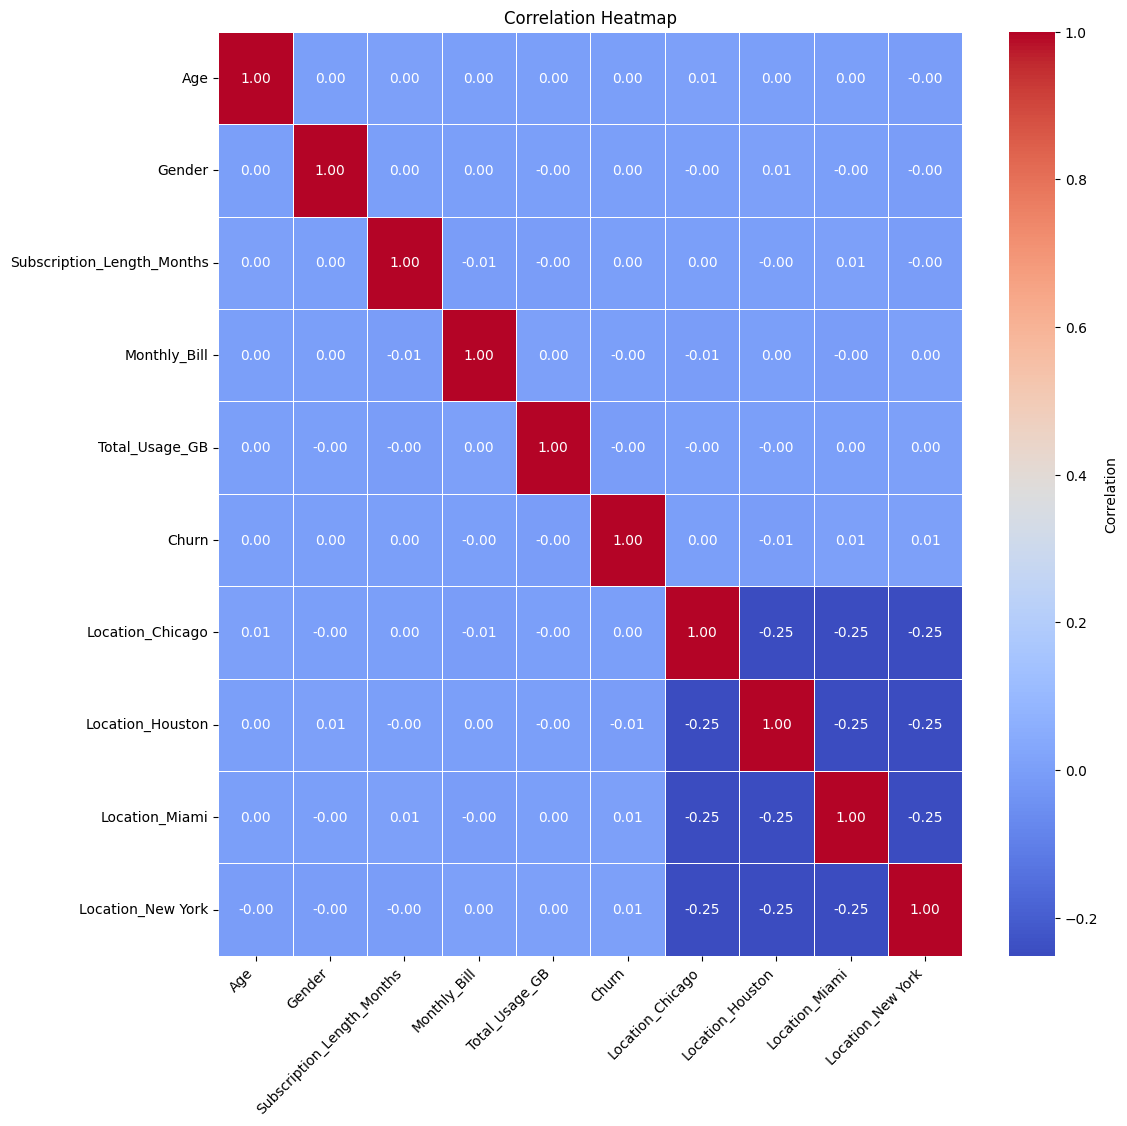

In [383]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a figure and axis for the heatmap
plt.figure(figsize=(12, 12))
ax = sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Set the title
plt.title("Correlation Heatmap")

# Customize x-axis and y-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

# Add color bar legend
cbar = ax.collections[0].colorbar
cbar.set_label("Correlation")

# Display the heatmap
plt.show()


In [384]:
df.head()
 

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Miami,Location_New York,Subscription_Length_Bin,Monthly_Bill_Bin
0,63,1,17,73.36,236,0,0,0,0,0,"[16, 20)","[70, 80)"
1,62,0,1,48.76,172,0,0,0,0,1,"[0, 4)","[40, 50)"
2,24,0,5,85.47,460,0,0,0,0,0,"[4, 8)","[80, 90)"
3,36,0,3,97.94,297,1,0,0,1,0,"[0, 4)","[90, 100)"
4,46,0,19,58.14,266,0,0,0,1,0,"[16, 20)","[50, 60)"


In [385]:
# Model Building


In [386]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [387]:
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Miami,Location_New York,Subscription_Length_Bin,Monthly_Bill_Bin
0,63,1,17,73.36,236,0,0,0,0,0,"[16, 20)","[70, 80)"
1,62,0,1,48.76,172,0,0,0,0,1,"[0, 4)","[40, 50)"
2,24,0,5,85.47,460,0,0,0,0,0,"[4, 8)","[80, 90)"
3,36,0,3,97.94,297,1,0,0,1,0,"[0, 4)","[90, 100)"
4,46,0,19,58.14,266,0,0,0,1,0,"[16, 20)","[50, 60)"


In [388]:
cols_to_scale = ['Age','Total_Usage_GB','Monthly_Bill','Subscription_Length_Months']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [389]:
X = df.drop(['Churn', 'Subscription_Length_Bin', 'Monthly_Bill_Bin','Location_Houston','Location_Chicago','Location_Miami','Location_New York'], axis=1)
print(X)

            Age  Gender  Subscription_Length_Months  Monthly_Bill  \
0      0.865385       1                    0.695652      0.619429   
1      0.846154       0                    0.000000      0.268000   
2      0.115385       0                    0.173913      0.792429   
3      0.346154       0                    0.086957      0.970571   
4      0.538462       0                    0.782609      0.402000   
...         ...     ...                         ...           ...   
99995  0.288462       1                    0.956522      0.359000   
99996  0.846154       0                    0.782609      0.452143   
99997  0.884615       1                    0.695652      0.944429   
99998  0.634615       0                    0.826087      0.275000   
99999  0.173077       0                    0.782609      0.665286   

       Total_Usage_GB  
0            0.413333  
1            0.271111  
2            0.911111  
3            0.548889  
4            0.480000  
...               ...  
999

In [390]:
y=df['Churn']
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

In [391]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [392]:
X_train.shape

(80000, 5)

In [393]:
X_test.shape

(20000, 5)

In [394]:
X_train.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
46628,0.288462,1,0.652174,0.100571,0.264444
92846,0.442308,1,0.304348,0.797429,0.075556
30440,0.442308,0,0.565217,0.681429,0.771111
79978,0.076923,1,0.478261,0.547000,0.288889
85038,0.230769,1,0.739130,0.817857,1.000000


In [325]:
X_test.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
60743,0.173077,1,0.043478,0.426000,0.697778
33949,0.326923,1,0.869565,0.247857,0.826667
52805,0.865385,0,0.217391,0.941571,0.755556
11804,0.903846,1,0.652174,0.066143,0.020000
9229,0.519231,0,0.913043,0.904714,0.795556


In [395]:
# LinearRegression

In [400]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [397]:
y_pred = model.predict(X_test)


In [398]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.5000680004894443


In [326]:
#LogisticRegression

In [327]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model_lr = LogisticRegression(random_state=5)

# Fit the model to the training data
model_lr.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model's accuracy
accuracy_lr = model_lr.score(X_test, y_test)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Accuracy: 0.4965


In [328]:
#svm 

In [329]:
from sklearn.svm import SVC

# Create an SVM model
model_svm = SVC(random_state=5)

# Fit the model to the training data
model_svm.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model's accuracy
accuracy_svm = model_svm.score(X_test, y_test)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.4973


In [401]:
# Decision Tree Classifier

In [402]:
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)


In [403]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [404]:
y_pred = model_dt.predict(X_test)

In [405]:
model_dt.score(X_test,y_test)

0.5014

In [406]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.50      0.80      0.61      9950
           1       0.51      0.21      0.30     10050

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.45     20000
weighted avg       0.50      0.50      0.45     20000



In [407]:
from imblearn.combine import SMOTEENN

# Initialize the SMOTEENN object
smote_enn = SMOTEENN()

# Fit and resample your data
X_resampled, y_resampled = smote_enn.fit_resample(X, y)


In [408]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [412]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [413]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.5391061452513967
              precision    recall  f1-score   support

           0       0.52      0.65      0.58      1223
           1       0.56      0.44      0.49      1283

    accuracy                           0.54      2506
   macro avg       0.54      0.54      0.54      2506
weighted avg       0.54      0.54      0.53      2506



In [414]:
# Random Forest Classifier

In [415]:
from sklearn.ensemble import RandomForestClassifier

In [428]:
model_rf=RandomForestClassifier( )

In [417]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [420]:
y_pred=model_rf.predict(X_test)

In [421]:
model_rf.score(X_test,y_test)

0.5013

In [422]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51      9950
           1       0.50      0.47      0.49     10050

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [450]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Apply PCA to your original data
pca = PCA(0.9)
X_pca = pca.fit_transform(X)

# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=5)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_pred_pca = model.predict(X_test_pca)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.50


In [427]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create an MLPClassifier (ANN) instance
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=2000, random_state=5)

# Train the ANN model on the scaled training data
ann_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = ann_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


In [453]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(5,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
2500/2500 [==============================] - 9s 3ms/step - loss: 0.6935 - accuracy: 0.5024
Epoch 2/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 3/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6932 - accuracy: 0.5026
Epoch 4/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 5/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6932 - accuracy: 0.5045
Epoch 6/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6931 - accuracy: 0.5042
Epoch 7/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6931 - accuracy: 0.5041
Epoch 8/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6931 - accuracy: 0.5055
Epoch 9/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6931 - accuracy: 0.5035
Epoch 10/10
2500/2500 [==============================] - 9s 3ms/step - loss: 0.693

In [454]:
model.evaluate(X_test, y_test) 

625/625 [==============================] - 2s 3ms/step - loss: 0.6936 - accuracy: 0.4980


[0.6936460137367249, 0.49799999594688416]

In [455]:
yp = model.predict(X_test)
yp[:5]

625/625 [==============================] - 2s 2ms/step


array([[0.48610964],
       [0.48443973],
       [0.48558703],
       [0.49083352],
       [0.48493478]], dtype=float32)

In [456]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [457]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [458]:
y_test[:10]

60743    1
33949    1
52805    1
11804    1
9229     1
49950    1
24988    0
90271    0
33532    0
88299    0
Name: Churn, dtype: int64

In [459]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.97      0.66      9950
           1       0.51      0.03      0.05     10050

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.35     20000
weighted avg       0.50      0.50      0.35     20000



Text(95.72222222222221, 0.5, 'Truth')

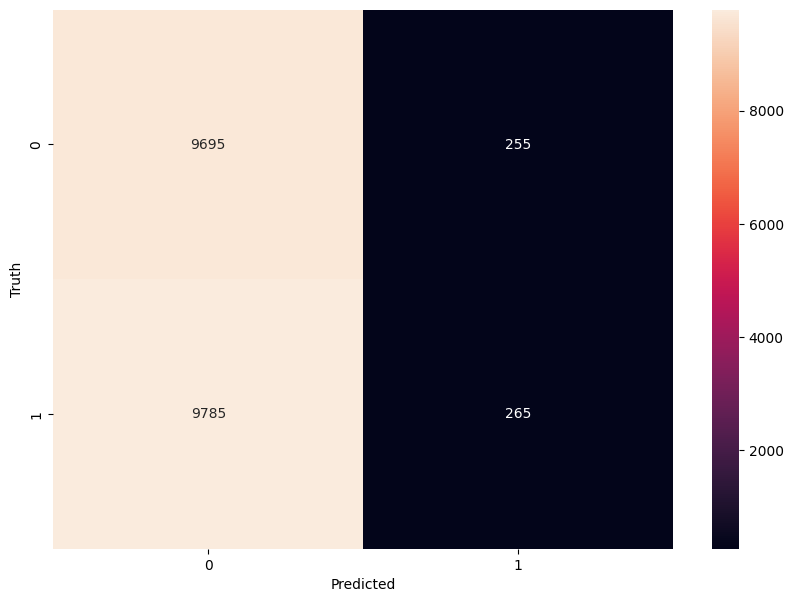

In [460]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [463]:
 import pickle

In [464]:
 filename = 'model.sav'

In [466]:
 pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load_model = pickle.load(open(filename, 'rb'))

In [467]:
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Miami,Location_New York,Subscription_Length_Bin,Monthly_Bill_Bin
0,0.865385,1,0.695652,0.619429,0.413333,0,0,0,0,0,"[16, 20)","[70, 80)"
1,0.846154,0,0.000000,0.268000,0.271111,0,0,0,0,1,"[0, 4)","[40, 50)"
2,0.115385,0,0.173913,0.792429,0.911111,0,0,0,0,0,"[4, 8)","[80, 90)"
3,0.346154,0,0.086957,0.970571,0.548889,1,0,0,1,0,"[0, 4)","[90, 100)"
4,0.538462,0,0.782609,0.402000,0.480000,0,0,0,1,0,"[16, 20)","[50, 60)"
